# Notas sobre la información

### Empezamos por analizar los datos. Tenemos el ID personal, el genero de la persona, la edad de la persona, si tiene hipertensión, si tiene enfermedades cardiacas, si ha estado casado, su tipo de trabajo, su tipo de vivienda, su promedio de glucosa sanguinea, su IMC, su experiencia como fumador, y si ha tenido derrames.

### Tenemos los datos representados de distinitas formas, el ID es un número entero, el sexo es un string, la edad es un float, hypertensión es un binario que indica verdadero o falso, lo mismo con enfermedades del corazón, si esta casado o no es un string, su tipo de trabajo y su tipo de residencia son string, el nivel de glucosa es un entero con decimales, el IMC es un entero con decimales, su experiencia con el cigarro es string y si ha tenido o no derrames es un binario.

### A partir de lo que tenemos queremos hacer un modelo de ML que sea capaz de predecir si una persona esta en riesgo de sufrir un derrame. Queremos saber cuales son las razones que influyen en ese riesgo y a partir de eso hacer una conclusión que nos diga que comportamientos generan o aumentan la probabilidad de derrames, y poder informar al público sobre esto.

# Empezamos con el código.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
#Importamos los datos
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Vemos los tipos de datos y sí tenemos datos vacios dentro de las columnas. En total tenemos datos de 5110 personas, en la columna de datos de IMC tenemos datos vacios, por lo que tenemos que resolver. Vamos a eliminar todas las filas en las que IMC tenga dato vacio.

In [3]:
data = data.dropna(subset = ['bmi'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [4]:
atributos_num1 = data[['age', 'avg_glucose_level', 'bmi', 'stroke', 'gender']]
atributos_personales = data[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]]

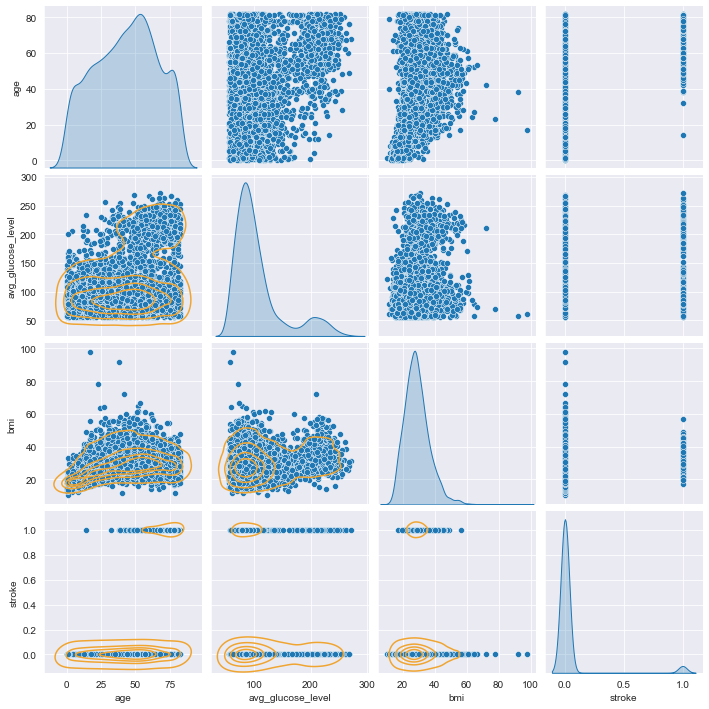

In [5]:
sns.set_style("darkgrid")
g = sns.pairplot(atributos_num1, diag_kind="kde")
g.map_lower(sns.kdeplot, levels = 5, color = "#F0A531FF", )

### En estas graficas podemos observar las relaciones que tienen las variables y la distribución de los datos por variable. Los histogramas representan la distribucion y son más faciles de visualizar, donde sea mayor se condensan más personas, y los diagramas de puntos son todos los datos disponibles, cada punto representa una persona.
### Tambien notamos que la mayoria de las graficas no son lineares, y tienden a dividirse en dos partes. Una de ellos conteniendo la mayoria de las personas por una gran diferencia, la unica grafica que no es así es la grafica de edad lo que representa que tenemos personas de todas las edades en algo que parece una distribuición de campana.

### Las lines naranjas representan en donde se concentran más los datos separados en 5 niveles, es decir cada 20% de los datos es una linea.

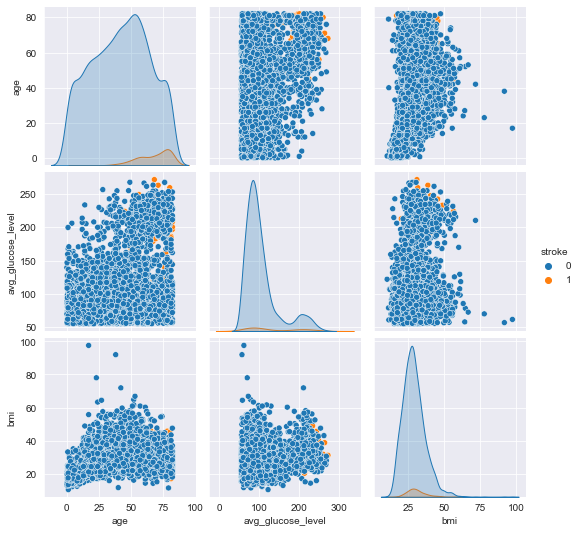

In [6]:
g = sns.pairplot(atributos_num1, diag_kind="kde", hue = "stroke")

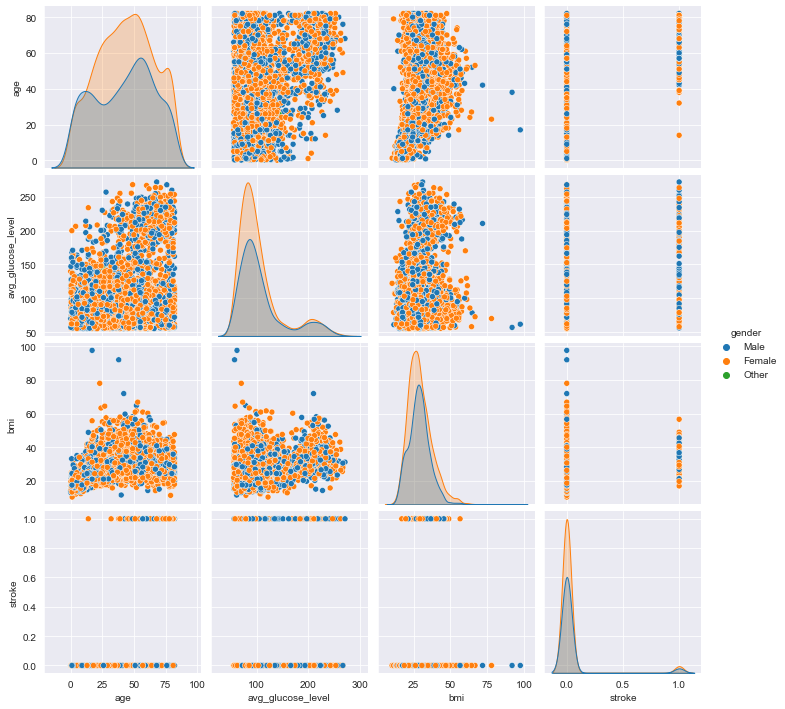

In [7]:
g = sns.pairplot(atributos_num1, diag_kind="kde", hue = "gender")

### Coloreando a las personas que han sufrido de derrames es más fácil identificar sus caracteristicas y sus datos, con esto ya nos podemos empezar a dar una idea, este es solo el primer paso, para asegurarnos vamos a utilizar un "heat-map" y ver cual es el parametro que más relación tiene con un derrame.

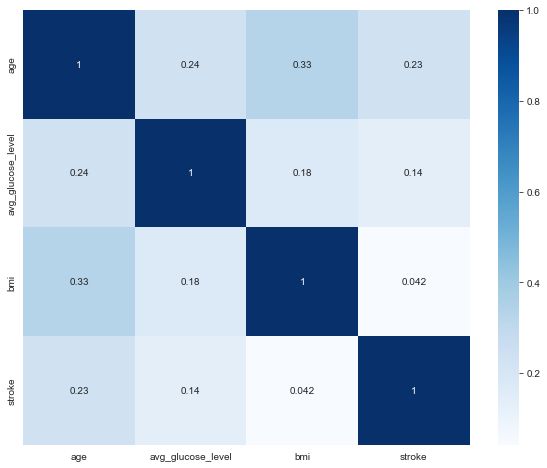

In [8]:
plt.figure(figsize=(10,8))
relacion = atributos_num1.corr()
sns.heatmap(relacion, annot=True, cmap=plt.cm.Blues)
plt.show()

### Con este mapa se observa que la edad es posiblemente el mayor influyente para un derrame, ya que sus cuadros son los cuadros con más relación y el que menos influencia tenga sea el IMC.

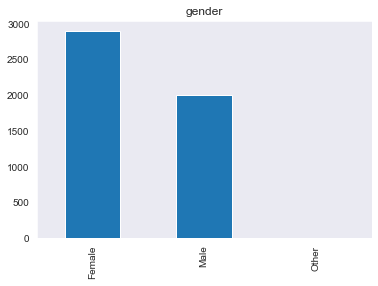

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


In [9]:
data["gender"].value_counts().plot(kind='bar')
plt.title("gender")
plt.grid()
plt.show()
print(data["gender"].value_counts())

### Vemos que el valor de "Other" no es muy significativo, por lo que lo eliminamos para simplificar el trabajo.

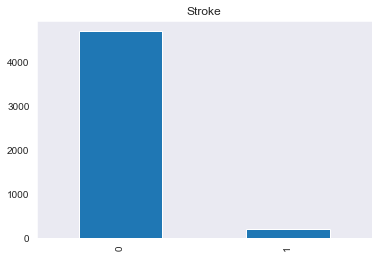

0    4700
1     209
Name: stroke, dtype: int64


In [10]:
data["stroke"].value_counts().plot(kind='bar')
plt.title("Stroke")
plt.grid()
plt.show()
print(data["stroke"].value_counts())

### Vemos que tenemos muy pocas personas que han sufrido de derrames, por lo que también tenemos pocos datos para ellos y eso puede afectar cuando hagamos nuestro modelo. 

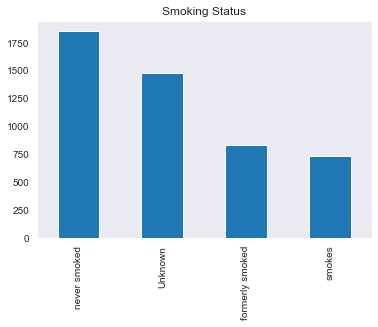

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


In [11]:
data["smoking_status"].value_counts().plot(kind='bar')
plt.title("Smoking Status")
plt.grid()
plt.show()
print(data["smoking_status"].value_counts())

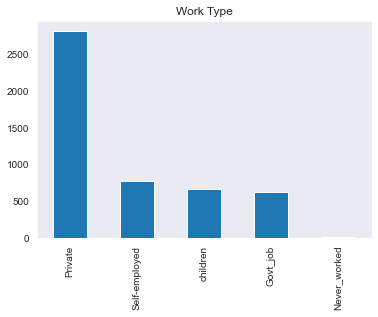

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


In [12]:
data["work_type"].value_counts().plot(kind='bar')
plt.title("Work Type")
plt.grid()
plt.show()
print(data["work_type"].value_counts())

In [13]:
data.drop(data.loc[data['gender']== 'Other'].index, inplace=True)

In [14]:
data.drop(data.loc[data['work_type']== 'Never_worked'].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4886 non-null   int64  
 1   gender             4886 non-null   object 
 2   age                4886 non-null   float64
 3   hypertension       4886 non-null   int64  
 4   heart_disease      4886 non-null   int64  
 5   ever_married       4886 non-null   object 
 6   work_type          4886 non-null   object 
 7   Residence_type     4886 non-null   object 
 8   avg_glucose_level  4886 non-null   float64
 9   bmi                4886 non-null   float64
 10  smoking_status     4886 non-null   object 
 11  stroke             4886 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 496.2+ KB


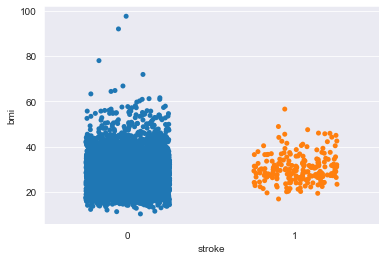

In [15]:
bmi = sns.stripplot(x="stroke", y="bmi", data = data, jitter=0.25)

### Queremos ver sí el IMC tiene algún patrón pero vemos que los que tienen derrames, se encuentran dentro de la mayoria de la población.

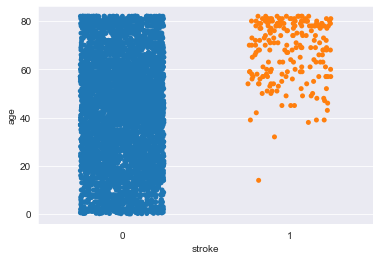

In [16]:
bmi = sns.stripplot(x="stroke", y="age", data = data, jitter=0.25)

### Con esta grafica confirmamos que la edad es un fuerte determinante para un derrame, ya que la mayoria de la población se encuentra más alta y muy pocos puntos se encuentran bajos.

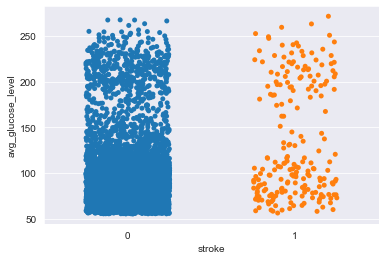

In [17]:
bmi = sns.stripplot(x="stroke", y="avg_glucose_level", data = data, jitter=0.25)

### Este puede ser un poco relevante pero no tan fuerte como la edad, en este caso vemos más puntos en la parte baja de la grafica pero no es muy significativo. 
### Vamos a sacar valores generales de los datos.

In [18]:
DataFrame = pd.DataFrame(data)
DataFrame.pop("id")
DataFrame.pop("gender")
DataFrame.pop("ever_married")
DataFrame.pop("work_type")
DataFrame.pop("smoking_status")
DataFrame.pop("Residence_type")
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4886 non-null   float64
 1   hypertension       4886 non-null   int64  
 2   heart_disease      4886 non-null   int64  
 3   avg_glucose_level  4886 non-null   float64
 4   bmi                4886 non-null   float64
 5   stroke             4886 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 396.2 KB


In [19]:
DataFrame.skew(axis = 0)
#Simetría de los datos, mientras más cerca del 0 más simetrico es.

age                 -0.128686
hypertension         2.817848
heart_disease        4.143655
avg_glucose_level    1.613278
bmi                  1.055719
stroke               4.520534
dtype: float64

In [39]:
DataFrame.kurtosis(axis = 0)
#Concentración de los valores en torno a su media. Mientras más alejado del 0 menos concentrado es.

age                  -0.978019
hypertension          5.942701
heart_disease        15.176086
avg_glucose_level     1.896839
bmi                   3.374485
stroke               18.442773
dtype: float64

In [21]:
DataFrame.std(axis = 0)
#Que tan dispersos son los valores de la media, mientras más alto el número más dispersos son.

age                  22.534968
hypertension          0.289485
heart_disease         0.217417
avg_glucose_level    44.481347
bmi                   7.853621
stroke                0.202371
dtype: float64

In [22]:
DataFrame.var(axis=0)
#Varianza, representa la variabilidad de los datos conforme a su media.

age                   507.824764
hypertension            0.083802
heart_disease           0.047270
avg_glucose_level    1978.590217
bmi                    61.679356
stroke                  0.040954
dtype: float64

In [23]:
DataFrame.median(axis=0)
#El valor que parte los datos en el medio.

age                  45.00
hypertension          0.00
heart_disease         0.00
avg_glucose_level    91.68
bmi                  28.10
stroke                0.00
dtype: float64

In [24]:
DataFrame.mean(axis=0)
#El promedio de los datos

age                   42.988973
hypertension           0.092305
heart_disease          0.049734
avg_glucose_level    105.339073
bmi                   28.909640
stroke                 0.042775
dtype: float64

### A partir de todos estos calculos y junto con las primeras graficas del proyecto nos podemos dar una idea mucho mayor de los datos, por ejemplo, podemos observar que tenemos mucha diferencia en las poblaciones con problemas de corazón y en la de personas con derrames. Otro es que los niveles de glucosa son los datos mas variados que tenemos junto con los de edad, la edad media es de 42 años, casi no tenemos personas con hypertension, problemas del corazón o derrames, el nivel de glucosa promedio es de 105.33, y el promedio de IMC es de 28.

### Mucha de esta información ya la teniamos pero de estos calculos adquirimos mucha nueva información.

### Empezamos a hacer el modelo de ML. Vamos a utilizar un modelo de Random Forest, que es una forma de ML que nos permite predecir con mayor precision un resultado ya que analiza varias posibilidades de modelos y los combina para predecir el mejor resultado. 

In [25]:
parametros = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = data
data_feature = pd.get_dummies(df, columns = parametros)
data_feature.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.6,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,105.92,32.5,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,171.23,34.4,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,174.12,24.0,1,1,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,186.21,29.0,1,0,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0


In [26]:
data_feature.pop('id')
Final = data_feature
Final.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,80.0,105.92,32.5,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.4,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.0,1,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,186.21,29.0,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


### Estos son los datos que vamos a tomar en cuenta para el modelo para el modelo. Hicimos este proceso para que las opciones de cada dato sea un sí o un no o datos numericos, no podemos trabajar con datos que no sean numericos.Esta es nuestra caja de herramientas de donde vamos a sacar valores aleatoriamentes y generar varios modelos. 

In [27]:
X = Final[[ 'age', 'avg_glucose_level', 'bmi', 'gender_Female',
            'gender_Male', 'hypertension_0', 'hypertension_1',
            'heart_disease_0', 'heart_disease_1', 'ever_married_No',
            'ever_married_Yes', 'work_type_Govt_job', 'work_type_Private',
            'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
            'Residence_type_Urban', 'smoking_status_Unknown',
            'smoking_status_formerly smoked', 'smoking_status_never smoked',
            'smoking_status_smokes'
        ]]

In [28]:
X.shape

(4886, 21)

### Tenemos un cuadro de datos de 4908 filas y 21 columnas. Lo que significa 4908 personas y 21 parametros por persona.

In [29]:
y = Final[['stroke']]

In [30]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#https://www.youtube.com/watch?v=J4Wdy0Wc_xQ
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:3]

array([[ 1.06560992,  2.77337717,  0.97931231, -1.20124935,  1.20124935,
         0.31889041, -0.31889041, -4.37115498,  4.37115498, -0.7245473 ,
         0.7245473 , -0.38474188,  0.85952896, -0.4341873 , -0.39899042,
        -0.98698603,  0.98698603, -0.65758992,  2.20102195, -0.77654258,
        -0.4214655 ],
       [ 1.6425502 ,  0.01306135,  0.45720667, -1.20124935,  1.20124935,
         0.31889041, -0.31889041, -4.37115498,  4.37115498, -0.7245473 ,
         0.7245473 , -0.38474188,  0.85952896, -0.4341873 , -0.39899042,
         1.01318557, -1.01318557, -0.65758992, -0.45433441,  1.2877594 ,
        -0.4214655 ],
       [ 0.26676953,  1.48146753,  0.69915806,  0.83246663, -0.83246663,
         0.31889041, -0.31889041,  0.22877249, -0.22877249, -0.7245473 ,
         0.7245473 , -0.38474188,  0.85952896, -0.4341873 , -0.39899042,
        -0.98698603,  0.98698603, -0.65758992, -0.45433441, -0.77654258,
         2.37267347]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3273, 21) (3273, 1)
Test set: (1613, 21) (1613, 1)


### Creamos subconjuntos de datos aleatorios a partir de la base de datos general que usaremos para entrenar los arboles.

In [32]:
weights = np.array([21 if i == 1 else 1 for i in y_train["stroke"]])
#intentamos balancer el peso de los datos

In [33]:
FOREST = RandomForestClassifier(random_state = 3, n_estimators = 400, max_depth = 10).fit(X_train, y_train.values.ravel(), sample_weight = weights.T)

FOREST_TRAIN = FOREST.score(X_train, y_train)
FOREST_TEST = FOREST.score(X_test, y_test)

print('Precisión de subdata:\t', FOREST_TRAIN)
print('Precisión real:\t\t', FOREST_TEST)

Precisión de subdata:	 0.9850290253589978
Precisión real:		 0.9355238685678859


In [34]:
print("REPORTE DE RESULTADOS DE TRAIN---------")
print(classification_report(y_train, FOREST.predict(X_train)))
print()
print("REPORTE DE RESULTADOS DE TEST----------")
print(classification_report(y_test, FOREST.predict(X_test)))


REPORTE DE RESULTADOS DE TRAIN---------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3135
           1       0.76      0.94      0.84       138

    accuracy                           0.99      3273
   macro avg       0.88      0.96      0.92      3273
weighted avg       0.99      0.99      0.99      3273


REPORTE DE RESULTADOS DE TEST----------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1542
           1       0.16      0.11      0.13        71

    accuracy                           0.94      1613
   macro avg       0.56      0.54      0.55      1613
weighted avg       0.92      0.94      0.93      1613

